In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
final_geo_df = pd.read_excel('Final geo df.xlsx')

In [3]:
all_metrics_columns = ['metric_1','metric_2','metric_3','metric_4','metric_5','metric_6','metric_7','metric_8','metric_9','metric_10']
all_original_metrics_columns = ['metric_1','metric_2_original','metric_3_original','metric_4','metric_5_original','metric_6_original','metric_7_original','metric_8','metric_9','metric_10_original']
not_inverted_metrics = ['metric_2','metric_6','metric_7','metric_8']
metrics_to_invert = [col for col in all_metrics_columns if col not in not_inverted_metrics]

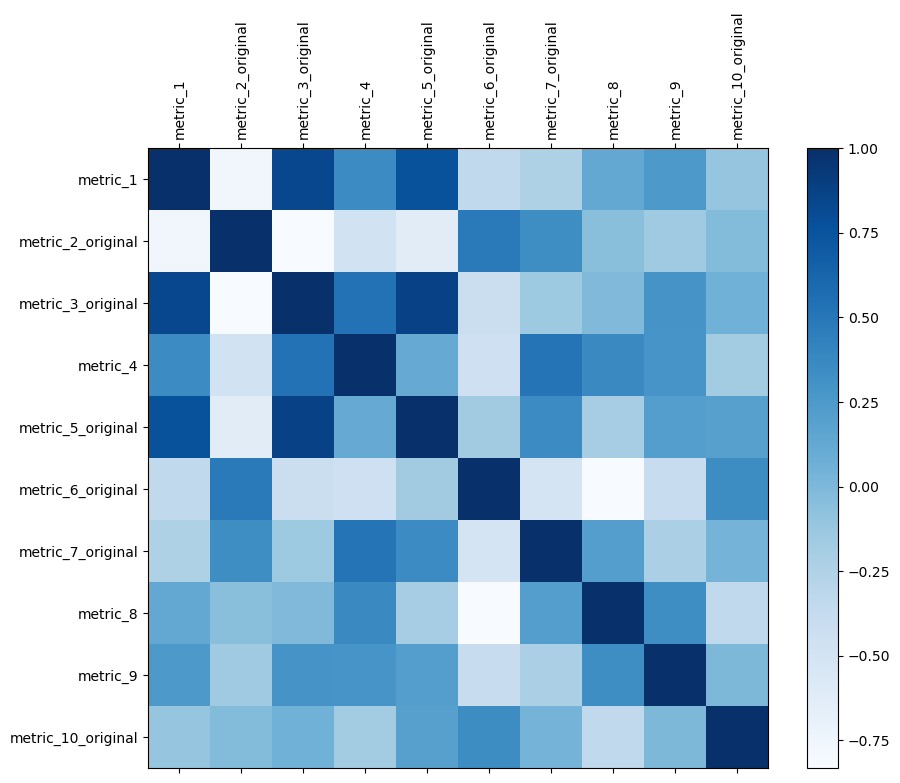

In [5]:
# Assuming BH_100 is your DataFrame, and all_original_metrics_columns contains the columns of interest
corr_matrix = final_geo_df.loc[:, all_original_metrics_columns].corr()

# Create the plot
plt.figure(figsize=(10, 8))

# Using a diverging colormap, such as `seismic`, `coolwarm`, or `PuBu_r`
# These will highlight 0 clearly while using one hue (for example, blue)
cax = plt.matshow(corr_matrix, cmap='Blues', fignum=1)  # Use any diverging colormap of your choice


# Add colorbar (legend)
plt.colorbar(cax)

# Add column and row names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90);  # Rotate x-axis labels
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns);

# Display the plot
plt.show()


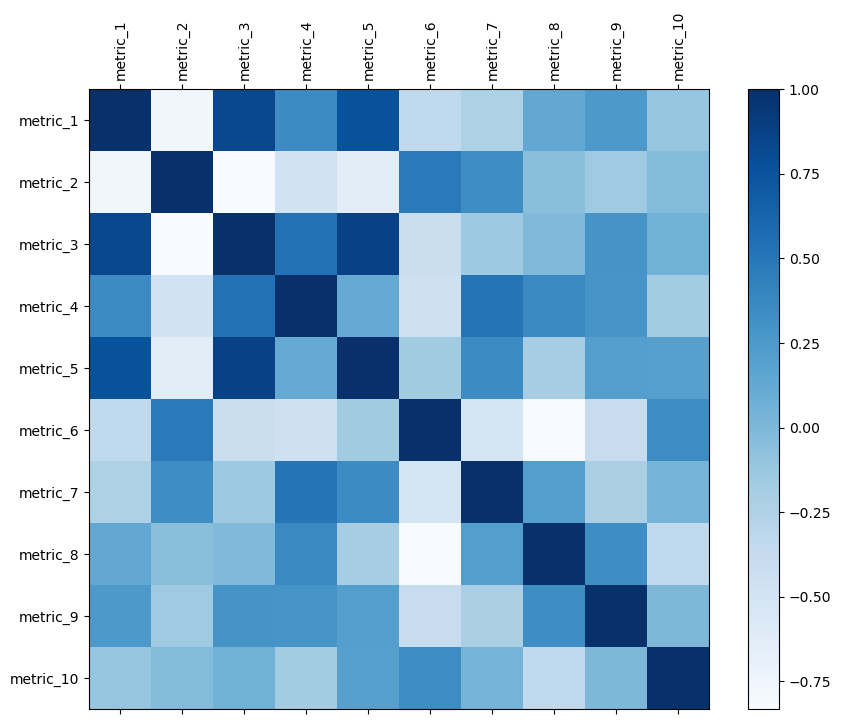

In [6]:
# Assuming BH_100 is your DataFrame, and all_original_metrics_columns contains the columns of interest
corr_matrix = final_geo_df.loc[:, all_metrics_columns].corr()


# Create the plot
plt.figure(figsize=(10, 8))

# Using a diverging colormap, such as `seismic`, `coolwarm`, or `PuBu_r`
# These will highlight 0 clearly while using one hue (for example, blue)
cax = plt.matshow(corr_matrix, cmap='Blues', fignum=1)  # Use any diverging colormap of your choice


# Add colorbar (legend)
plt.colorbar(cax)

# Add column and row names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90);  # Rotate x-axis labels
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns);

# Display the plot
plt.show()


In [7]:
final_geo_df.loc[:, all_original_metrics_columns].corr()

,metric_1,metric_2_original,metric_3_original,metric_4,metric_5_original,metric_6_original,metric_7_original,metric_8,metric_9,metric_10_original
metric_1,1.000000,-0.773631,0.833854,0.352279,0.763489,-0.352314,-0.242922,0.130055,0.255183,-0.107747
metric_2_original,-0.773631,1.000000,-0.827158,-0.482982,-0.626962,0.472967,0.338691,-0.058831,-0.157885,-0.023900
metric_3_original,0.833854,-0.827158,1.000000,0.533233,0.872480,-0.421232,-0.149666,-0.011505,0.287809,0.062249
metric_4,0.352279,-0.482982,0.533233,1.000000,0.111298,-0.458057,0.513918,0.364568,0.282411,-0.174647
metric_5_original,0.763489,-0.626962,0.872480,0.111298,1.000000,-0.168127,0.350604,-0.192553,0.207300,0.192298
metric_6_original,-0.352314,0.472967,-0.421232,-0.458057,-0.168127,1.000000,-0.509692,-0.832158,-0.397118,0.345822
metric_7_original,-0.242922,0.338691,-0.149666,0.513918,0.350604,-0.509692,1.000000,0.210388,-0.222378,0.038965
metric_8,0.130055,-0.058831,-0.011505,0.364568,-0.192553,-0.832158,0.210388,1.000000,0.337914,-0.351954
metric_9,0.255183,-0.157885,0.287809,0.282411,0.207300,-0.397118,-0.222378,0.337914,1.000000,0.003574
metric_10_original,-0.107747,-0.023900,0.062249,-0.174647,0.192298,0.345822,0.038965,-0.351954,0.003574,1.000000


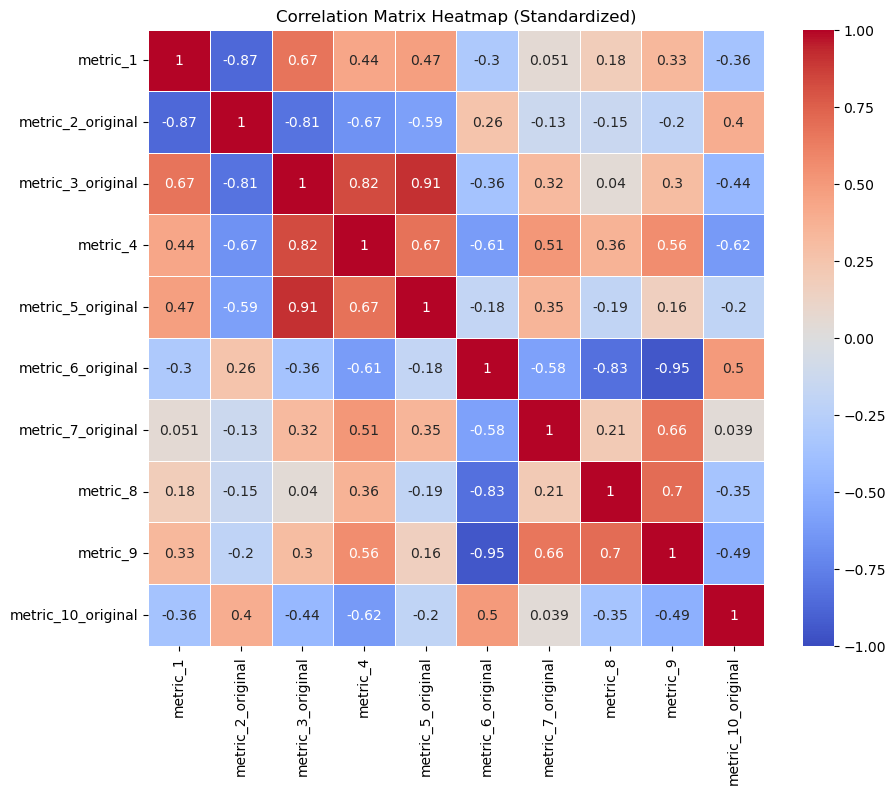

In [8]:
features = all_original_metrics_columns
x = final_geo_df.dropna(how='any').loc[:, features].values
#y = BH_100.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

standardized_df = pd.DataFrame(x, columns=features)

# Compute the correlation matrix
corr_matrix = standardized_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, final_geo_df['irregularity_index']], axis = 1)

In [10]:
principalDf

,principal component 1,principal component 2
0,4.053910,-2.060768
1,0.864358,1.766488
2,0.700456,1.367840
3,-2.152851,0.644905
4,2.064703,0.013394
5,-0.442705,-1.821990
6,-1.834265,1.495887
7,-3.830987,-2.263608
8,0.577380,0.857852


In [11]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)

# Display the loadings
print(loadings)

                         PC1       PC2
metric_1            0.304058 -0.244556
metric_2_original  -0.333431  0.324075
metric_3_original   0.374207 -0.328441
metric_4            0.405421 -0.050882
metric_5_original   0.289820 -0.379094
metric_6_original  -0.344475 -0.400590
metric_7_original   0.234313  0.202905
metric_8            0.218177  0.465580
metric_9            0.330412  0.398571
metric_10_original -0.278640 -0.061048


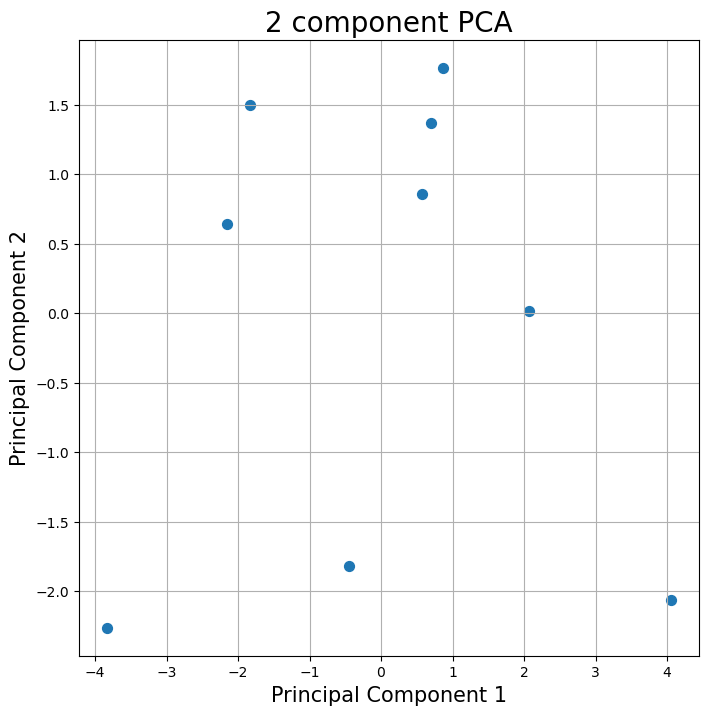

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(finalDf.loc[:, 'principal component 1'], 
           finalDf.loc[:, 'principal component 2'],
           s = 50)

ax.grid()

In [13]:
pca.explained_variance_ratio_

array([0.50155614, 0.23412741])

In [14]:
final_geo_df[features].describe()

,metric_1,metric_2_original,metric_3_original,metric_4,metric_5_original,metric_6_original,metric_7_original,metric_8,metric_9,metric_10_original
count,34.000000,34.000000,34.000000,38.000000,39.000000,48.000000,10.000000,10.000000,34.000000,32.000000
mean,0.337450,25.513752,15.739928,0.219988,115.640772,6.575409,112.639162,0.473131,0.897417,9.031734
std,0.233909,16.713414,8.133726,0.263353,101.535176,2.813232,21.667916,0.303679,0.190607,8.508999
min,0.000000,4.123467,2.553153,0.000000,0.000000,1.472144,77.950772,0.000000,0.000000,0.000000
25%,0.137664,12.479815,11.213031,0.000000,40.000087,4.513022,99.933054,0.271888,0.898372,1.586676
50%,0.273957,21.477768,14.648550,0.133929,70.000050,6.198945,119.499054,0.472417,0.968057,6.142409
75%,0.486251,34.428817,20.700644,0.323529,170.000537,8.014245,121.945566,0.660725,0.995707,15.128563
max,1.000000,78.720982,30.995444,1.000000,349.996670,16.159371,151.738568,1.000000,1.000000,29.421683


In [15]:
len(final_geo_df[features].dropna(how='any'))



9

In [16]:
kmeans = KMeans(n_clusters=3)  # You can experiment with the number of clusters
kmeans.fit(x)  # 'x' being the scaled version of your metrics
labels = kmeans.labels_

In [17]:
labels

array([0, 2, 2, 1, 2, 2, 1, 1, 2], dtype=int32)

**Factor analysis**

In [18]:
# Factor analysis
fa = FactorAnalysis(n_components=2)
components = fa.fit_transform(x)

In [19]:

rf = RandomForestRegressor()
rf.fit(x, labels)
feature_importance = rf.feature_importances_
